(-0.5, 1501.5, 395.5, -0.5)

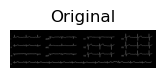

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread('ECG Normal News.JPG', cv2.IMREAD_GRAYSCALE)

# Afficher l'image originale
plt.subplot(235), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')




In [ ]:
# Inverser les couleurs de l'image
inverted_image = cv2.bitwise_not(image)
plt.subplot(232), plt.imshow(inverted_image, cmap='gray'), plt.title('Inversion')
plt.axis('off')

# Redimensionner l'image
resized_image = cv2.resize(inverted_image, (inverted_image.shape[1]//2, inverted_image.shape[0]//2))
plt.subplot(233), plt.imshow(resized_image, cmap='gray'), plt.title('Redimensionnement')
plt.axis('off')

# Appliquer un filtre d'affûtage
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(resized_image, -1, kernel)
plt.subplot(234), plt.imshow(sharpened_image, cmap='gray'), plt.title('Affûtage')
plt.axis('off')

# Appliquer un seuil pour binariser l'image
_, thresholded_image = cv2.threshold(sharpened_image, 127, 255, cv2.THRESH_BINARY)
plt.subplot(235), plt.imshow(thresholded_image, cmap='gray'), plt.title('Seuil')
plt.axis('off')

# Afficher les résultats
plt.show()

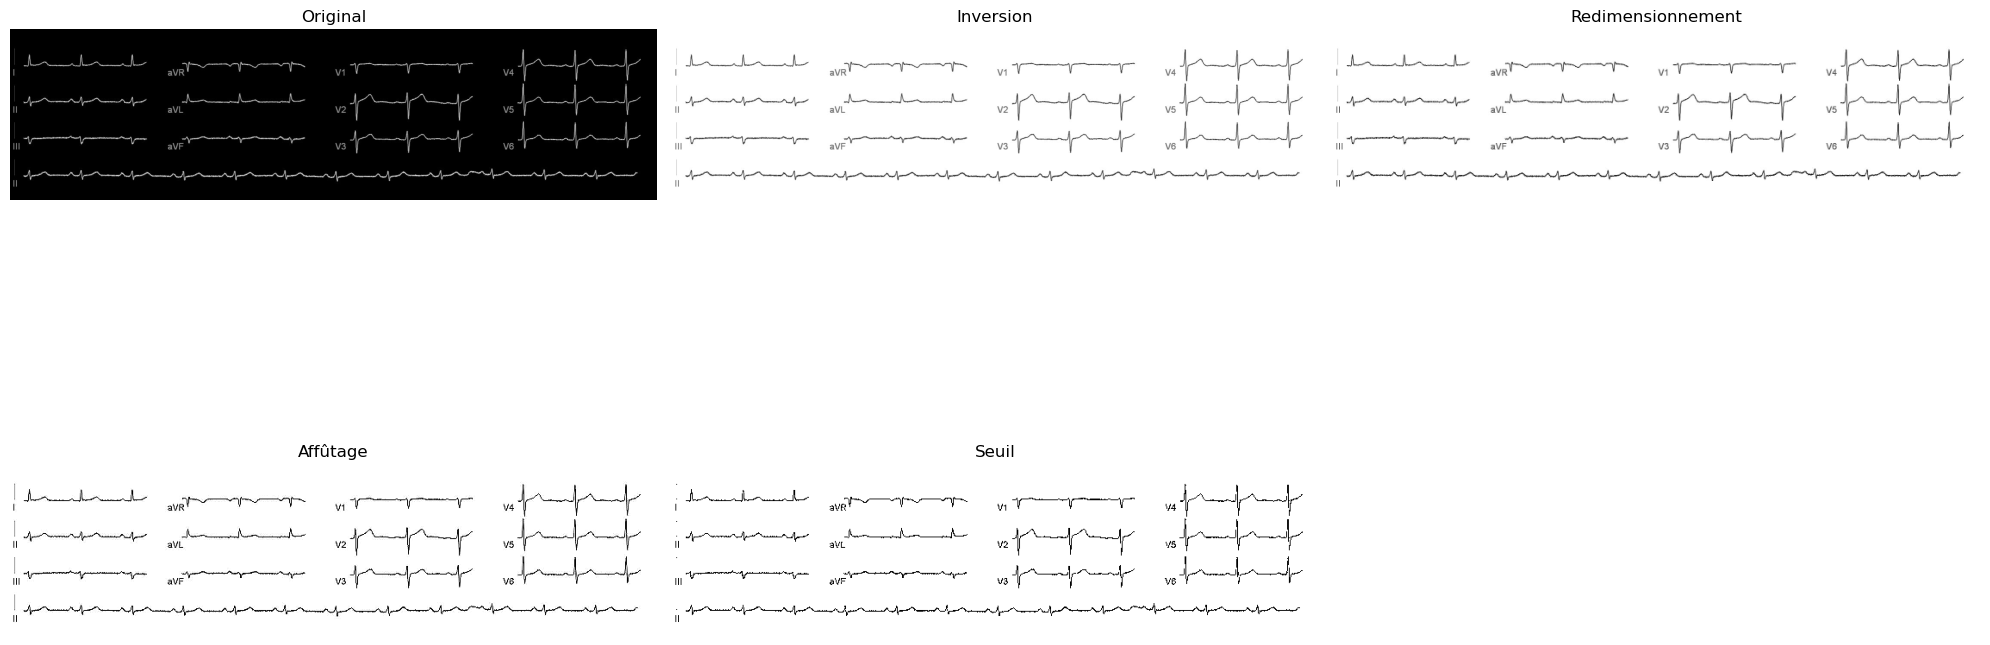

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread('ECG Normal News.JPG', cv2.IMREAD_GRAYSCALE)

# Créer une figure de taille plus grande
plt.figure(figsize=(20, 10))

# Afficher l'image originale
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')

# Inverser les couleurs de l'image
inverted_image = cv2.bitwise_not(image)
plt.subplot(232), plt.imshow(inverted_image, cmap='gray'), plt.title('Inversion')
plt.axis('off')

# Redimensionner l'image
resized_image = cv2.resize(inverted_image, (inverted_image.shape[1]//2, inverted_image.shape[0]//2))
plt.subplot(233), plt.imshow(resized_image, cmap='gray'), plt.title('Redimensionnement')
plt.axis('off')

# Appliquer un filtre d'affûtage
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(resized_image, -1, kernel)
plt.subplot(234), plt.imshow(sharpened_image, cmap='gray'), plt.title('Affûtage')
plt.axis('off')

# Appliquer un seuil pour binariser l'image
_, thresholded_image = cv2.threshold(sharpened_image, 127, 255, cv2.THRESH_BINARY)
plt.subplot(235), plt.imshow(thresholded_image, cmap='gray'), plt.title('Seuil')
plt.axis('off')

# Afficher les résultats
plt.tight_layout()
plt.show()


In [10]:
#Extraire les coordonnées du signal :
coords = np.column_stack(np.where(thresholded_image < 255))


In [13]:
#Trier les coordonnées par l'axe x
coords = coords[np.argsort(coords[:, 1])]


In [15]:
#Interpolation pour obtenir une courbe continue

from scipy.interpolate import UnivariateSpline

x = coords[:, 1]
y = coords[:, 0]

# Inversion de l'axe y pour correspondre à la représentation standard du signal ECG
y = thresholded_image.shape[0] - y

spline = UnivariateSpline(x, y)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)


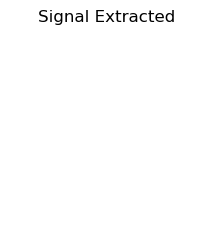

In [16]:
plt.subplot(236)
plt.plot(x_smooth, y_smooth, color='blue')
plt.title('Signal Extracted')
plt.axis('off')

plt.tight_layout()
plt.show()


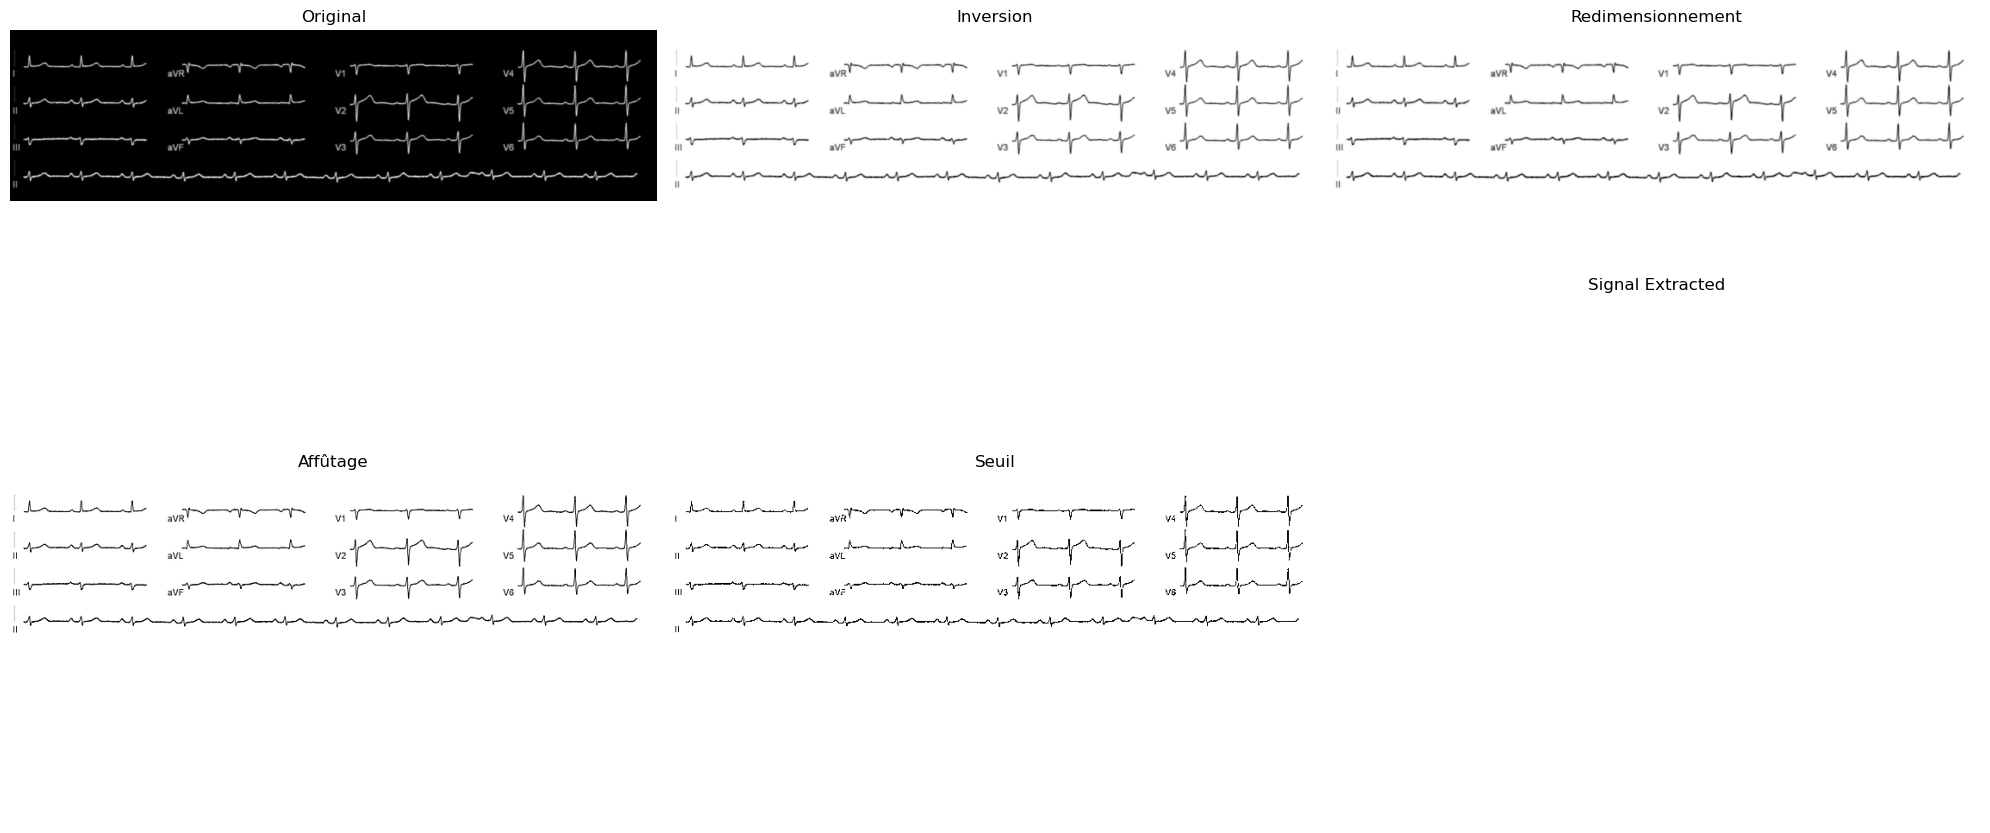

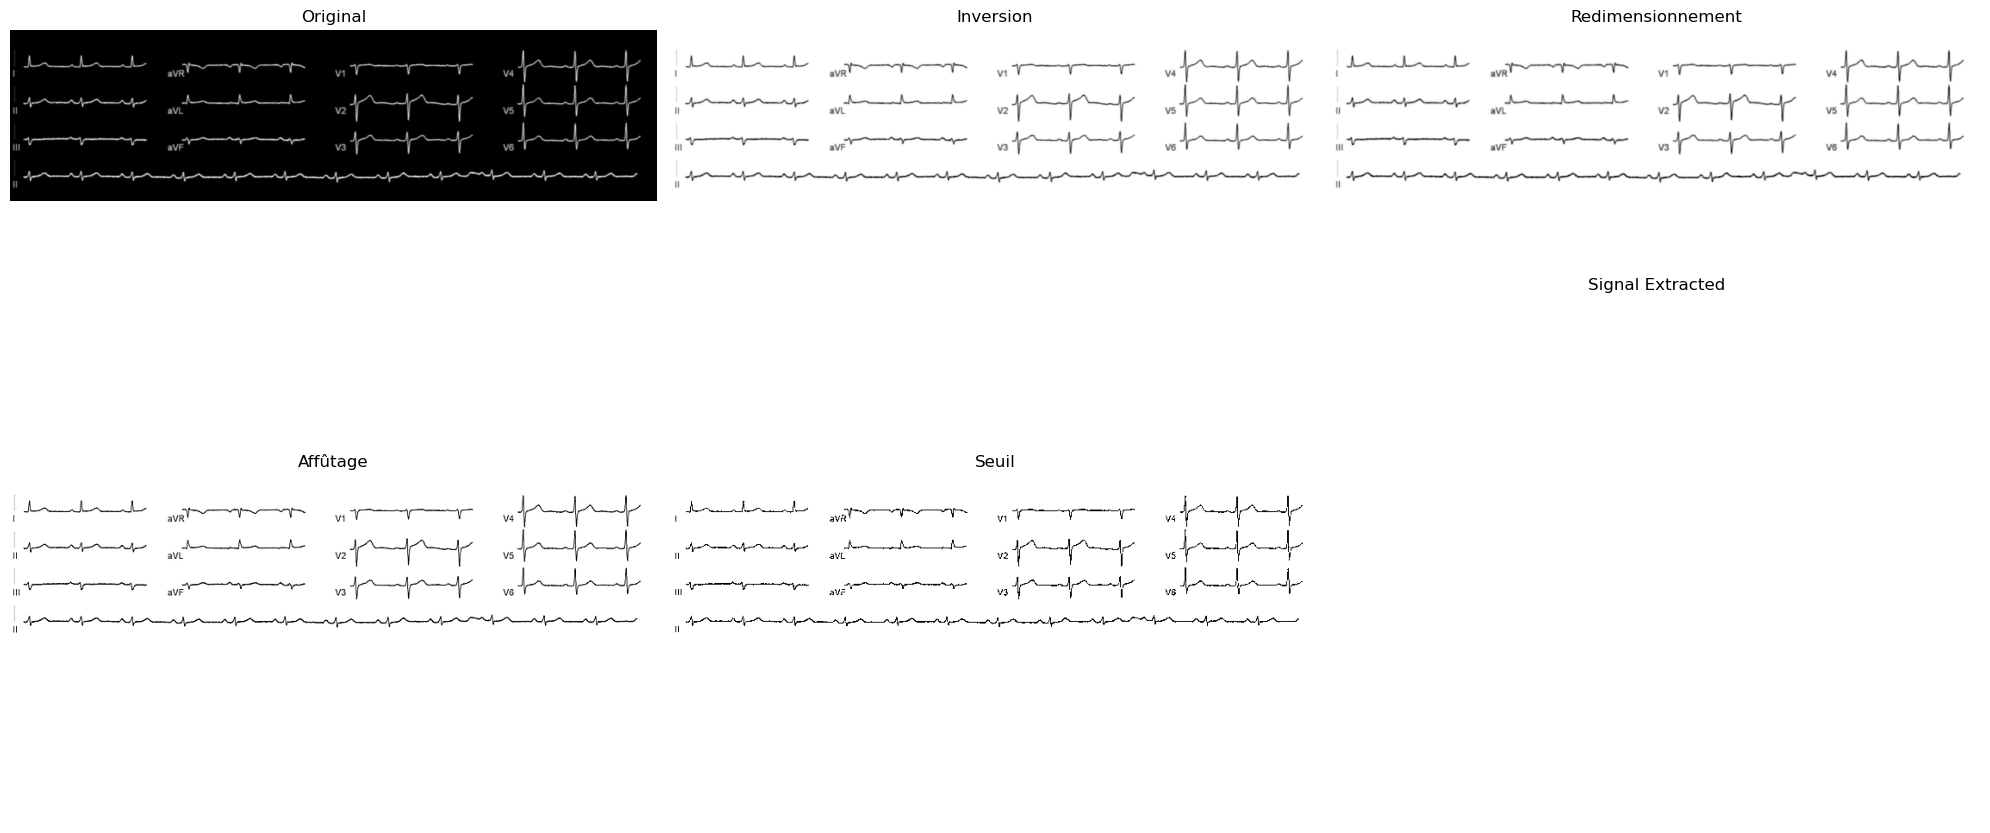

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

# Charger l'image en niveaux de gris
image = cv2.imread('ECG Normal News.JPG', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("L'image n'a pas pu être chargée. Vérifiez le chemin du fichier.")

# Prétraiter l'image (exemple : filtrage gaussien pour réduire le bruit)
image = cv2.GaussianBlur(image, (5, 5), 0)

# Inverser les couleurs de l'image
inverted_image = cv2.bitwise_not(image)

# Redimensionner l'image si nécessaire (par exemple, réduire de moitié)
resized_image = cv2.resize(inverted_image, (inverted_image.shape[1] // 2, inverted_image.shape[0] // 2))

# Appliquer un filtre d'affûtage pour améliorer les contours du signal
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(resized_image, -1, kernel)

# Appliquer un seuil pour binariser l'image
_, thresholded_image = cv2.threshold(sharpened_image, 127, 255, cv2.THRESH_BINARY)

# Afficher les étapes de traitement
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(232), plt.imshow(inverted_image, cmap='gray'), plt.title('Inversion')
plt.axis('off')
plt.subplot(233), plt.imshow(resized_image, cmap='gray'), plt.title('Redimensionnement')
plt.axis('off')
plt.subplot(234), plt.imshow(sharpened_image, cmap='gray'), plt.title('Affûtage')
plt.axis('off')
plt.subplot(235), plt.imshow(thresholded_image, cmap='gray'), plt.title('Seuil')
plt.axis('off')

# Extraire les coordonnées du signal
coords = np.column_stack(np.where(thresholded_image < 255))

# Vérifier les coordonnées extraites
if len(coords) == 0:
    raise ValueError("Aucun point de signal trouvé. Vérifiez les étapes de traitement de l'image.")

# Trier les coordonnées par l'axe x
coords = coords[np.argsort(coords[:, 1])]

# Interpoler pour obtenir une courbe continue (utilisation de spline, par exemple)
# Supposons que l'axe x représente le temps et l'axe y représente l'amplitude du signal
x = coords[:, 1]
y = coords[:, 0]

# Inversion de l'axe y pour correspondre à la représentation standard du signal ECG
y = thresholded_image.shape[0] - y

# Interpolation du signal
spline = UnivariateSpline(x, y, s=0.9)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Afficher le signal extrait
plt.subplot(236)
plt.plot(x_smooth, y_smooth, color='blue')
plt.title('Signal Extracted')
plt.axis('off')

plt.tight_layout()
plt.show()


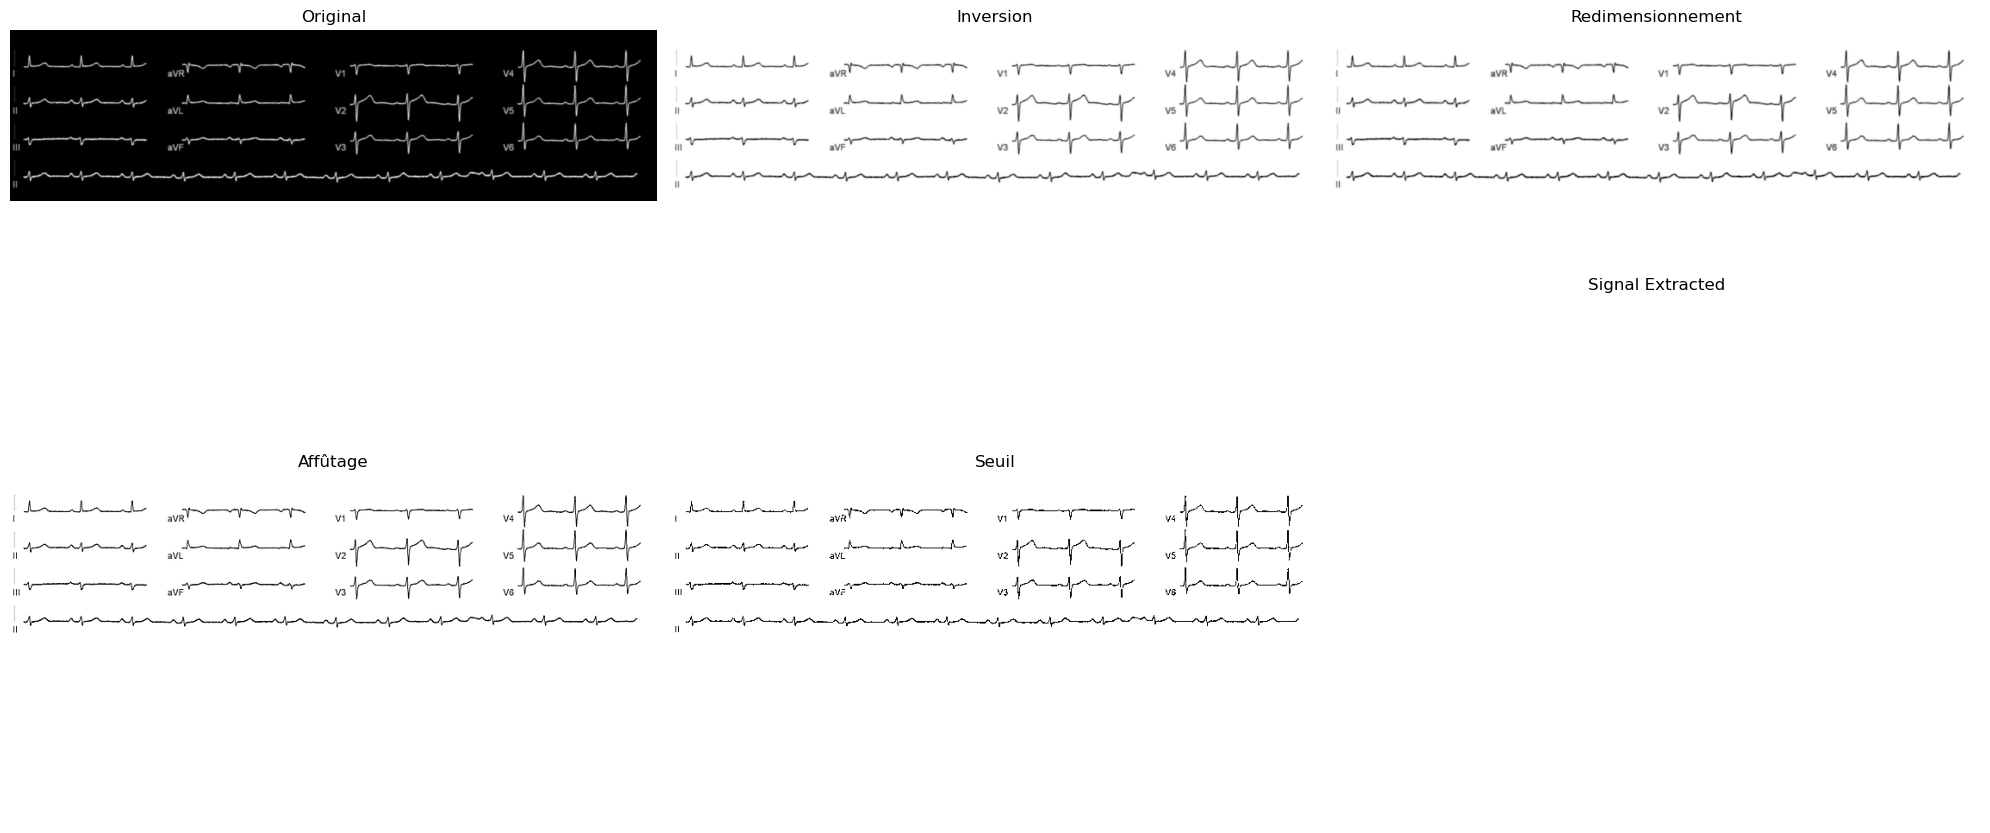

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

# Charger l'image en niveaux de gris
image = cv2.imread('ECG Normal News.JPG', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("L'image n'a pas pu être chargée. Vérifiez le chemin du fichier.")

# Prétraiter l'image (exemple : filtrage gaussien pour réduire le bruit)
image = cv2.GaussianBlur(image, (5, 5), 0)

# Inverser les couleurs de l'image
inverted_image = cv2.bitwise_not(image)

# Redimensionner l'image si nécessaire (par exemple, réduire de moitié)
resized_image = cv2.resize(inverted_image, (inverted_image.shape[1] // 2, inverted_image.shape[0] // 2))

# Appliquer un filtre d'affûtage pour améliorer les contours du signal
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(resized_image, -1, kernel)

# Appliquer un seuil pour binariser l'image
_, thresholded_image = cv2.threshold(sharpened_image, 127, 255, cv2.THRESH_BINARY)

# Afficher et sauvegarder les étapes de traitement
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(232), plt.imshow(inverted_image, cmap='gray'), plt.title('Inversion')
plt.axis('off')
plt.subplot(233), plt.imshow(resized_image, cmap='gray'), plt.title('Redimensionnement')
plt.axis('off')
plt.subplot(234), plt.imshow(sharpened_image, cmap='gray'), plt.title('Affûtage')
plt.axis('off')
plt.subplot(235), plt.imshow(thresholded_image, cmap='gray'), plt.title('Seuil')
plt.axis('off')

# Sauvegarder les images intermédiaires
cv2.imwrite('original_image.png', image)
cv2.imwrite('inverted_image.png', inverted_image)
cv2.imwrite('resized_image.png', resized_image)
cv2.imwrite('sharpened_image.png', sharpened_image)
cv2.imwrite('thresholded_image.png', thresholded_image)

# Extraire les coordonnées du signal
coords = np.column_stack(np.where(thresholded_image < 255))

# Vérifier les coordonnées extraites
if len(coords) == 0:
    raise ValueError("Aucun point de signal trouvé. Vérifiez les étapes de traitement de l'image.")

# Trier les coordonnées par l'axe x
coords = coords[np.argsort(coords[:, 1])]

# Interpoler pour obtenir une courbe continue (utilisation de spline, par exemple)
# Supposons que l'axe x représente le temps et l'axe y représente l'amplitude du signal
x = coords[:, 1]
y = coords[:, 0]

# Inversion de l'axe y pour correspondre à la représentation standard du signal ECG
y = thresholded_image.shape[0] - y

# Interpolation du signal
spline = UnivariateSpline(x, y, s=0.5)
x_smooth = np.linspace(x.min(), x.max(), 1000)
y_smooth = spline(x_smooth)

# Afficher le signal extrait
plt.subplot(236)
plt.plot(x_smooth, y_smooth, color='blue')
plt.title('Signal Extracted')
plt.axis('off')

plt.tight_layout()
plt.savefig('signal_extracted.png')  # Sauvegarder le graphique du signal extrait
plt.show()
